In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 46 Clothing Categories

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
torch.cuda.set_device(0)

## Looking at the data

Classification of Cloth Categories

Large-scale Fashion Recognition and Retrieval (DeepFashion) Dataset 
Category and Attribute Prediction Benchmark

By Multimedia Lab, The Chinese University of Hong Kong


For more information about the dataset, visit the project website:

  http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html


  @inproceedings{liu2016deepfashion,
 	author = {Ziwei Liu, Ping Luo, Shi Qiu, Xiaogang Wang, and Xiaoou Tang},
 	title = {DeepFashion: Powering Robust Clothes Recognition and Retrieval with Rich Annotations},
 	booktitle = {Proceedings of IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
 	month = June,
 	year = {2016} 
  }

In [ ]:
cd drive/MyDrive/Fine-Grained-Clothing-Classification/

[Errno 2] No such file or directory: 'drive/MyDrive/Fine-Grained-Clothing-Classification/'
/content/drive/MyDrive/Fine-Grained-Clothing-Classification


In [ ]:
ls

46_Clothing_Categories.ipynb  export.pkl                              LICENSE
data/                         Inference_46_Clothing_Categories.ipynb  README.md


In [ ]:
path = Path("data/cloth_categories/")

In [ ]:
img_dir_path = path/"img"
len(img_dir_path.ls())

555

In [ ]:
fnames = get_image_files(img_dir_path/"Zip-Up_Puffer_Jacket")
fnames[:5]

[PosixPath('data/cloth_categories/img/Zip-Up_Puffer_Jacket/img_00000037.jpg'),
 PosixPath('data/cloth_categories/img/Zip-Up_Puffer_Jacket/img_00000032.jpg'),
 PosixPath('data/cloth_categories/img/Zip-Up_Puffer_Jacket/img_00000021.jpg'),
 PosixPath('data/cloth_categories/img/Zip-Up_Puffer_Jacket/img_00000025.jpg'),
 PosixPath('data/cloth_categories/img/Zip-Up_Puffer_Jacket/img_00000006.jpg')]

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, csv_labels="train_labels.csv", ds_tfms=get_transforms(), size=150)
data.normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 17870
  warn(warn_msg)


You can deactivate this warning by passing `no_check=True`.


ImageDataBunch;

Train: LabelList (20108 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
Culottes,Culottes,Culottes,Culottes,Culottes
Path: data/cloth_categories;

Valid: LabelList (5026 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
Jeans,Hoodie,Jacket,Jacket,Jacket
Path: data/cloth_categories;

Test: None

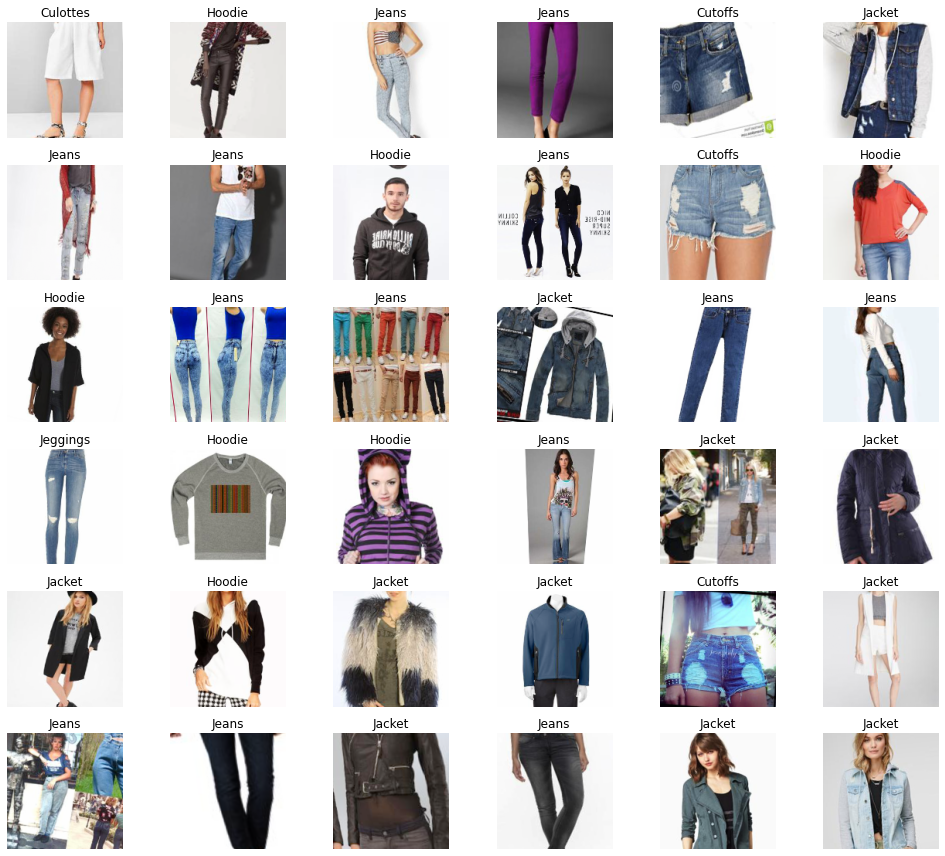

In [ ]:
data.show_batch(rows=6, figsize=(14,12))

In [ ]:
print(data.classes)
len(data.classes),data.c

['Bomber', 'Button-Down', 'Caftan', 'Capris', 'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Flannel', 'Gauchos', 'Halter', 'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs']


(19, 19)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 ouptuts).

We will train for 10 epochs (10 cycles through all our data).

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time


FileNotFoundError: ignored

In [ ]:
learn.save('stage-1_sz-150')

### Visualize and Analyze

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=80)

In [ ]:
# This is for accuracy in top 3 -
def accuracy_topk(output, target, topk=(3,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [ ]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(3,))

In [ ]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(5,))

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [ ]:
learn.load('stage-1_sz-150')
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20, max_lr=slice(3e-7,3e-5))

In [ ]:
learn.save('stage-1-34_sz-150')

### Visualize and Analyze

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=80)

In [ ]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(3,))

In [ ]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(5,))

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [ ]:
data = ImageDataBunch.from_csv(path, csv_labels="train_labels.csv" , ds_tfms=get_transforms(), size=150)
data.normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [ ]:
#Before Unfreezing let's see how much effetive is resnet50
learn.fit_one_cycle(10)

In [ ]:
# let's save model for further unfreeze training
learn.save('stage-1_arch-50_sz-150')

### Visualize and Analyze

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=80)

In [ ]:
# This is for accuracy in top 3 -
def accuracy_topk(output, target, topk=(3,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [ ]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(3,))

In [ ]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(5,))

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [ ]:
learn.load('stage-1_arch-50_sz-150')
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:

learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5))

In [ ]:
learn.save('stage-1_arch-50_sz-150-unfreeze')

### Visualize and Analyze

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=80)

In [ ]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(3,))

In [ ]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(5,))

## Training: resnet152

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet152 (resnet34 is a 34 layer residual network while resnet152 has 152 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet152 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=get_transforms(), size=299, bs=32)
data.normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet152, metrics=accuracy)

In [ ]:
#Before Unfreezing let's see how much effetive is resnet100
learn.fit_one_cycle(5)

In [ ]:
# let's save model for further unfreez training
learn.save('stage-1-100')

In [ ]:
# let's find optimal learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Unfreeze Resnet to apply new optimal learning rate
learn.unfreeze()
# train for 1 cycle to see if metrics is improving
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

In [ ]:
# It did improved so let's train it for 5 more cycle
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))